# Graph Theory: Simple and Shortest Paths - Lab

## Introduction
In this lab, we shall work with Florentine families graph.
[Click here to see details on Florantine family dataset](http://www.casos.cs.cmu.edu/computational_tools/datasets/external/padgett/index2.html). This dataset comes bundled with networkx [as shown here](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.florentine_families_graph.html#networkx.generators.social.florentine_families_graph). Visit these links to get some idea about the contents of this dataset. We shall use it as an undirected dataset for this lab and work on identifying paths between different nodes. 
<img src="http://www.promoguidesiena.it/admin/img/022013/1362048286CaterinaDeMediciweddinguffizi5470.jpg" width=300>

## Objectives
You will be able to:
- Load and study Florentine families graph generator in networkx
- Calculate and visualize the different paths between a given set of nodes

### Load and Draw Florentine families graph generator with a Fruchterman Reingold layout

Note: Refer to the documentation for methods to load the required graph and layout. 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


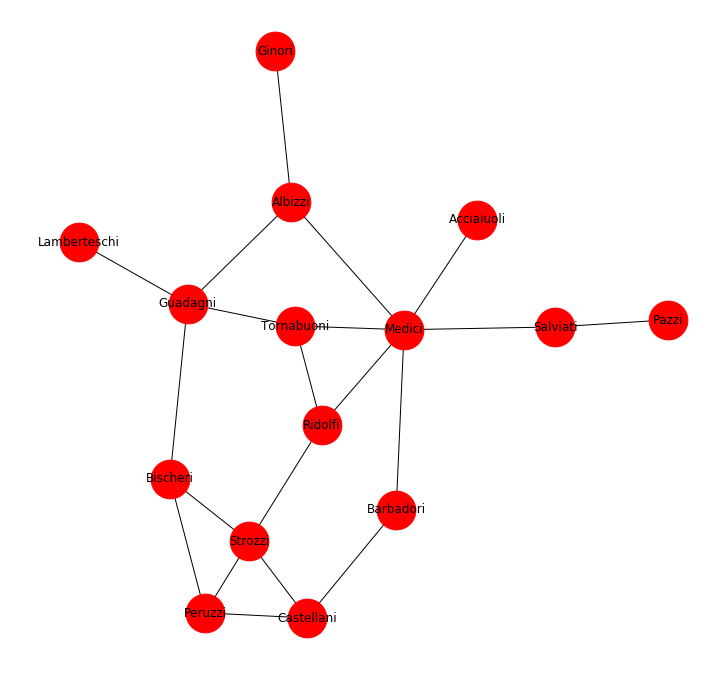

In [12]:
# Your code here 
import networkx as nx
import matplotlib.pyplot as plt

flor = nx.generators.social.florentine_families_graph()
plt.figure(figsize = (12,12));
plt.axis('off');
pos = nx.fruchterman_reingold_layout(flor)
nx.draw(flor, pos, with_labels = True, node_size = 1500, text_size = 10)

### Calculate shortest path between Medici and Peruzzi families

In [13]:
# Your code here
nx.shortest_path(flor,'Medici','Peruzzi')

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

You will see above that the shortest paths may not necessarily be unique i.e. there can be more than one , while counting the number of hops. We can use `all_shortest_paths()` method to find if there are more than one. 

### Calculate all shortest paths between Medici and Peruzzi families

In [16]:
# Your code here
asp = nx.all_shortest_paths(flor,'Medici','Peruzzi')
for path in asp:
    print(path)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']


### Calculate and draw the shortest path between Lamberteschi and Ridolfi families

- Create a function plot_paths(G, paths) that would take in a graph with calculated path(s)
- Use `fruchterman_reingold_layout()`
- For all paths in `paths`, color the edges and display the graph 
- Print the path in the output 

In [20]:
edgelist = [(path[i], path[i+1]) for i in range(len(path)-1)]
edgelist

[('Medici', 'Ridolfi'), ('Ridolfi', 'Strozzi'), ('Strozzi', 'Peruzzi')]

In [21]:
edgelist+edgelist

[('Medici', 'Ridolfi'),
 ('Ridolfi', 'Strozzi'),
 ('Strozzi', 'Peruzzi'),
 ('Medici', 'Ridolfi'),
 ('Ridolfi', 'Strozzi'),
 ('Strozzi', 'Peruzzi')]

In [25]:
source = 'Lamberteschi'
target = 'Ridolfi'

['Lamberteschi', 'Guadagni', 'Tornabuoni', 'Ridolfi']


/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


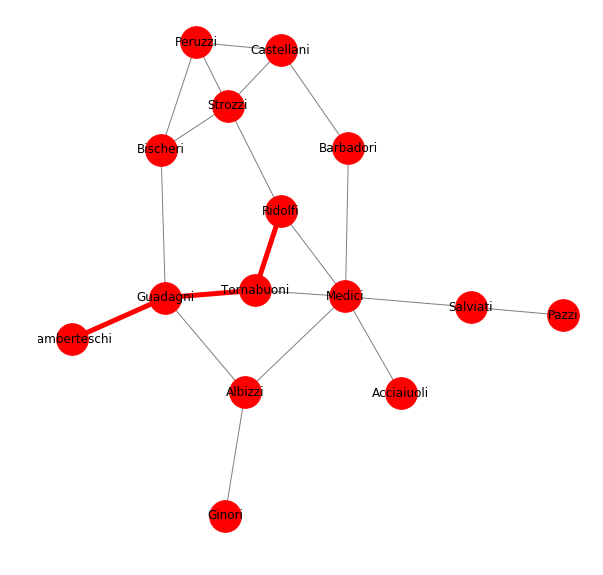

In [34]:
def plot_paths(G, paths):
    edgelists = []
    for path in paths:
        edgelist = [(path[i], path[i+1]) for i in range(len(path)-1)]
        edgelists+=edgelist
    plt.figure(figsize = (10,10))
    plt.axis('off')
    layout = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, layout, node_size=1000)
    nx.draw_networkx_labels(G, pos=layout, font_size=12)
    nx.draw_networkx_edges(G, layout, width=1, edge_color = 'grey')
    nx.draw_networkx_edges(G, layout, edgelist = edgelists, width=5, edge_color = 'red')
    
print(nx.shortest_path(flor, source, target))

plot_paths(flor, [nx.shortest_path(flor, source, target)])

### Calculate and draw all simple paths between Lamberteschi and Ridolfi families
- Use `nx.all_simple_paths(G, source, target)` to calculate all possible paths between two families and plot them.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


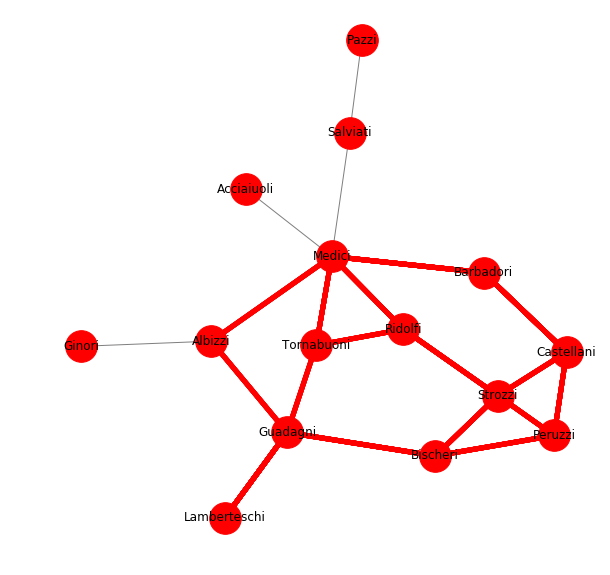

In [36]:
# Your code here 
paths = nx.all_simple_paths(flor,'Lamberteschi','Ridolfi')
plot_paths(flor,paths)

## Level Up - Optional 

- Modify the `plot_paths()` to show each path in a different graph, with edge width showing the **distance** between source and target. 

- Prettify the graph entities further in order to make it more presentable

## Summary 

In this lab, we saw how to calculate and visualize paths between a given set of nodes in a graph. The skills learned in these simple exercises can be scaled to deal with much larger networks with possible tens of thousands of nodes (or maybe more) to identify paths between node entities. We mainly looked at calculating the simple distance, but the idea can be applied to directed and weighted networks with same level of ease. 